In [19]:
import pickle
import pandas
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [21]:
ball_positions = [x.get(1,[]) for x in ball_positions]

df_ball_positions = pd.DataFrame(ball_positions, columns =['x1','y1','x2','y2'])
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [22]:
df_ball_positions['mid_y'] = (df_ball_positions['y1']+df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()


In [23]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,892.740051,614.842224,912.821960,636.365540,625.603882,625.603882
1,892.740051,614.842224,912.821960,636.365540,625.603882,625.603882
2,876.136322,630.968292,896.552582,653.179443,642.073868,631.093877
3,859.532593,647.094360,880.283203,669.993347,658.543854,637.956371
4,846.991760,660.540588,866.084412,681.710632,671.125610,644.590219
...,...,...,...,...,...,...
209,1184.488159,248.282776,1199.705688,265.618774,256.950775,283.085243
210,1184.576294,233.534973,1196.093628,246.410583,239.972778,269.071252
211,1183.293213,227.154877,1195.682007,241.841766,234.498322,256.814767
212,1180.384644,213.835648,1194.388184,229.726547,221.781097,244.867236


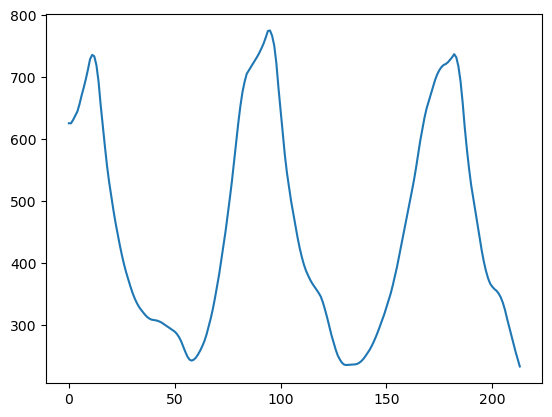

In [24]:
plt.plot(df_ball_positions['mid_y_rolling_mean']) #Turning point signifies ball hit

In [25]:
df_ball_positions['mid_y'] = (df_ball_positions['y1']+df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

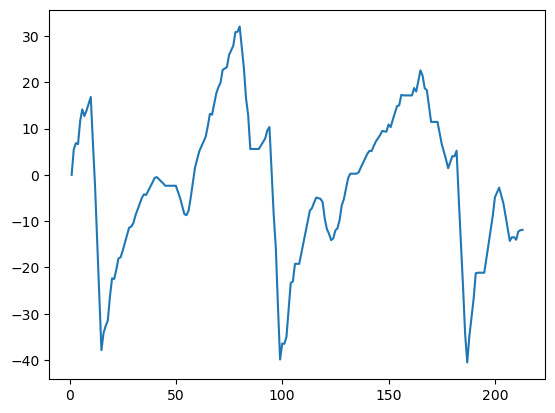

In [26]:
plt.plot(df_ball_positions['delta_y'])

In [27]:
df_ball_positions['ball_hit'] = 0

In [28]:
df_ball_positions['mid_y'] = (df_ball_positions['y1']+df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

hit_frames_threshold = 25
for i in range(1,len(df_ball_positions)-int(hit_frames_threshold*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1]<0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1]>0

    if negative_position_change or positive_position_change:
        count = 0
        for change_frame in range(i+1, i+int(hit_frames_threshold*1.2)):
            negative_position_change_next_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame+1]<0
            positive_position_change_next_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame+1]>0

            if negative_position_change and negative_position_change_next_frame:
                count +=1
            if positive_position_change and positive_position_change_next_frame:
                count +=1
        if count > hit_frames_threshold-1:
            df_ball_positions['ball_hit'].iloc[i]=1
frames_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

/var/folders/cw/jpmlzv892j3bwm0g2lghpmhc0000gq/T/ipykernel_3650/3299484820.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i]=1
/var/folders/cw/jpmlzv892j3bwm0g2lghpmhc0000gq/T/ipykernel_3650/3299484820.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i]=1
/var/folders/cw/jpmlzv892j3bwm0g2lghpmhc0000gq/T/ipykernel_3650/3299484820.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [30]:
df_ball_positions[df_ball_positions['ball_hit']==1] #frames when ball is hit

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,779.729696,721.287170,796.819173,740.330444,730.808807,736.009637,6.903937,1
58,925.504382,240.885297,937.554260,253.658258,247.271777,242.405068,-1.646990,1
95,624.415802,748.323608,641.920593,768.035095,758.179352,775.397028,0.866730,1
131,716.384918,229.174377,728.357086,242.501457,235.837917,235.339113,-0.694547,1
182,1294.975342,739.954163,1313.678223,759.991577,749.972870,737.164441,5.219702,1


In [32]:
frames_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [33]:
frames_ball_hits

[11, 58, 95, 131, 182]